# Kaggle Titanic

Source : https://www.kaggle.com/c/titanic

This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

There are 2 datas provided : train.csv and test.csv.

train.csv is meant for the user to train their model.

test.csv is meant to test the model.

The result from the test.csv can be uploaded to Kaggle for the classification report.

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Import train.csv Files

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Meanwell, Miss. (Marion Ogden)",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Explore the train.csv dataset

### Check whether there are null data

<AxesSubplot:>

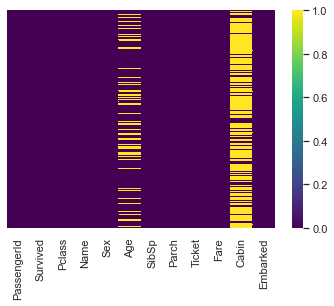

In [6]:
sns.heatmap(train_data.isnull(), cmap = 'viridis', yticklabels=False)

Some of the Age data are missing, 
Cabin data are also missing
There are 2 Embarked data that are missing

In [7]:
age_null = len(train_data[train_data['Age'].isnull()])/len(train_data)
print(f'Age data is null by {age_null:.2%} percent')

cabin_null = len(train_data[train_data['Cabin'].isnull()])/len(train_data)
print(f'Cabin data is null by {cabin_null:.2%} percent')

embarked_null = len(train_data[train_data['Embarked'].isnull()])/len(train_data)
print(f'Embarked data is null by {embarked_null:.2%} percent')

Age data is null by 19.87% percent
Cabin data is null by 77.10% percent
Embarked data is null by 0.22% percent


Things to be done with the null values :
1. Age -> We will fill the missing data with the mean age of each Pclass
2. Cabin -> Deemed the data as not relevant with the 'Survived' data (And as there are a lot of missing data)
3. Embarked -> Remove the NA value as the number of missing data is not a lot.

#### Create Boxplot for Age and Sex

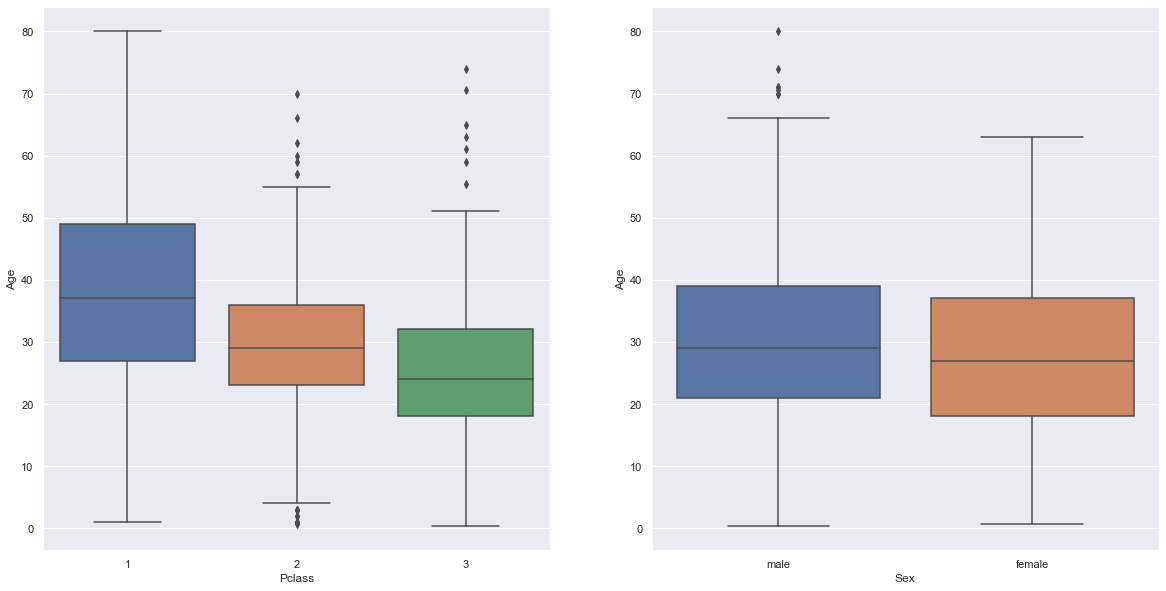

In [8]:
fig, ax = plt.subplots(ncols = 2, figsize = (20,10))
pclass_age = sns.boxplot(x='Pclass', y='Age', data = train_data, ax=ax[0])

sex_age = sns.boxplot(x='Sex', y='Age', data = train_data, ax=ax[1])

plt.show()

#### Imposing the missing age data

In [9]:
mean_age = pd.DataFrame(data = train_data.groupby(by='Pclass')['Age'].mean())
mean_age.rename(columns = {'Age':'Mean Age'}, inplace = True)
mean_age

,Mean Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [10]:
def impose_age(cols):
    _pclass = cols[0]
    _age = cols[1]
    if pd.isnull(_age):
        if _pclass == 1:
            _age = 38
        if _pclass == 2:
            _age = 30
        else:
            _age = 25
    return _age

### Create a train_data_copy set (which will be used for the model training later)

In [11]:
train_data_copy = train_data.copy()

In [12]:
train_data_copy['Age'] = train_data_copy[['Pclass','Age']].apply(impose_age, axis=1)

### Create the dist plot for the categorical and numerical feature

#### Create Age Histogram

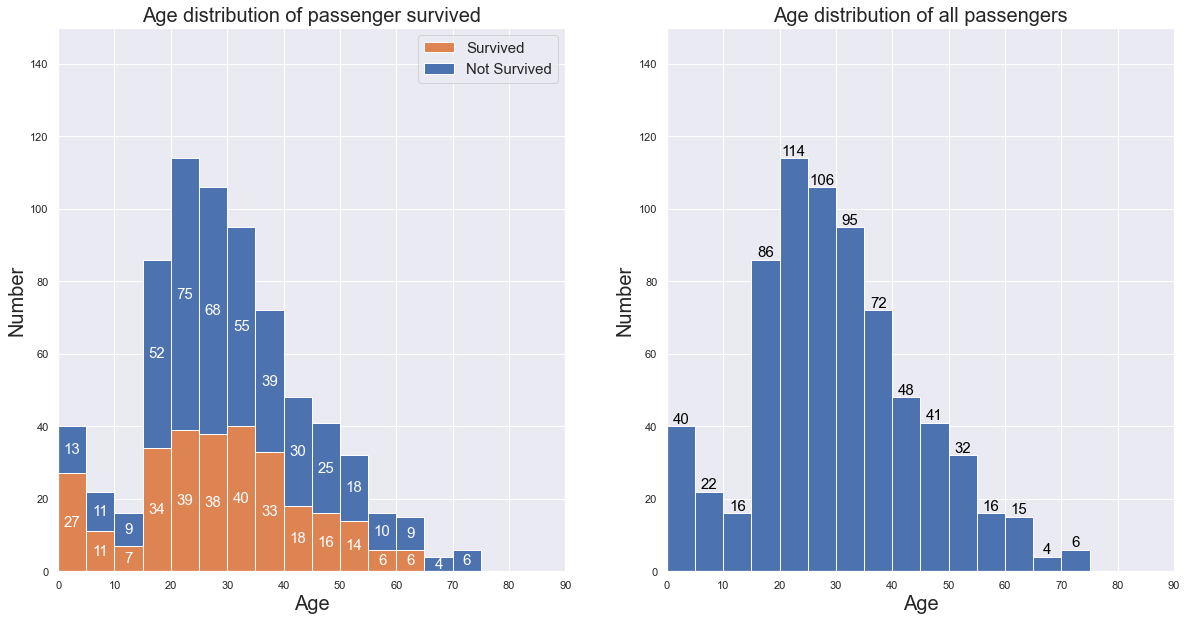

In [13]:
#Determine binsedges
binsedges = np.arange(0, 80, 5)

#Setting the figure and subplots
fig,ax = plt.subplots(figsize=(20,10), ncols=2)

#Setting the seaborn style graphs
sns.set_style('darkgrid')

#Plotting axes[0]
age_total = sns.histplot(data=train_data[train_data['Age'].notnull()], 
                         x='Age', 
                         hue='Survived', 
                         kde = False, 
                         bins=binsedges, 
                         alpha=1, 
                         multiple='stack', 
                         ax=ax[0])

#Renaming the legend for axes[0]
age_total.legend(['Survived','Not Survived'], 
                 fontsize=15)

#Insert the count text for axes[0]
for p in age_total.patches:
    #If the height == 0, then do not print the text
    if int(p.get_height()) == 0:
        continue
    else:
        age_total.text(p.get_x() + p.get_width()/2.,
            p.get_height()/2+p.get_y(),
            '{}'.format(int(p.get_height())), 
            fontsize=15,
            color='white',
            ha='center',
            va='center')

#Formatting of axes[0]
age_total.set_title('Age distribution of passenger survived',size=20)
age_total.set_ylabel('Number', size=20)
age_total.set_xlabel('Age', size=20)
age_total.set_ylim([0,150])
age_total.set_xlim([0,90])

#Plotting axes[1]
age = sns.histplot(data=train_data, 
                   x='Age', 
                   kde = False, 
                   bins=binsedges, 
                   alpha=1, 
                   ax=ax[1])

#Formatting axes[1]
age.set_title('Age distribution of all passengers', size=20)
age.set_ylabel('Number',size=20)
age.set_xlabel('Age',size=20)
age.set_ylim([0,150])
age.set_xlim([0,90])

#Insert the count text for axes[1]
for p in age.patches:
    age.text(p.get_x() + p.get_width()/2.,
            p.get_height(),
            '{}'.format(int(p.get_height())), 
            fontsize=15,
            color='black',
            ha='center',
            va='bottom')

#Showing the figure
plt.show()

#### Create Pclass, Sex countplot, hue = Survived

In [14]:
def convert_to_yes_no(number):
    if number == 0:
        number = 'No'
    elif number == 1:
        number = 'Yes'
    else:
        number = 'It is not 0 or 1, pls reinput'
    return number;

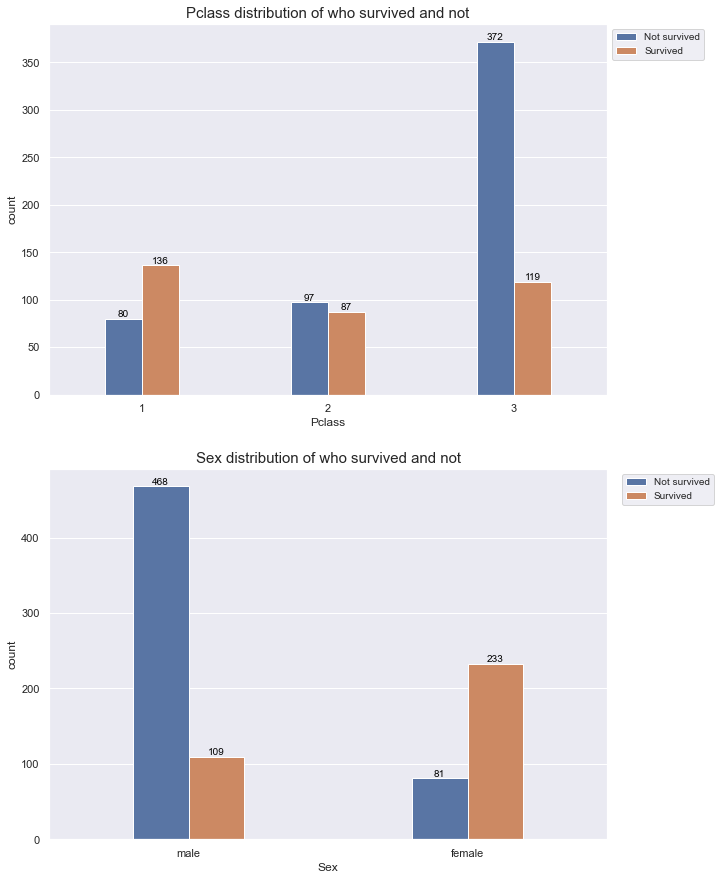

In [15]:
#Determine figure
fig, ax = plt.subplots(figsize=(10,15), nrows=2)

#Plot graph 1 : Pclass vs Count
pclass_graph = sns.countplot(x='Pclass', data=train_data, hue='Survived', ax=ax[0])
pclass_graph.legend(['Not survived','Survived'],
          fontsize = 10, 
          bbox_to_anchor = (1,1))
pclass_graph.set_title('Pclass distribution of who survived and not', 
                       size = 15)

#Width of Column
col_width = 0.2

#Show count text on the graph
count=0
for p in pclass_graph.patches:
    
    #Adjust Width Column
    x = p.get_bbox().get_points()[:,0]
    p.set_width(col_width)
    
    if count < len(pclass_graph.patches)/2:
        p.set_x(x[1]-col_width)
    else:
        p.set_x(x[0])
        
    #Show count text
    pclass_graph.text(p.get_x() + p.get_width()/2,
            p.get_height(),
            '{}'.format(int(p.get_height())), 
            fontsize=10,
            color='black',
            ha='center',
            va='bottom')
    count+=1

#Plot grapth 2 : Sex vs Count
sex_graph = sns.countplot(x='Sex', 
                          data=train_data, 
                          hue='Survived', 
                          ax=ax[1])
sex_graph.legend(['Not survived','Survived'],
          fontsize = 10, 
          bbox_to_anchor=(1.2,1))
sex_graph.set_title('Sex distribution of who survived and not', 
                       size = 15)


#Show count text on the graph
count = 0
for p in sex_graph.patches:
    
    #Adjust Column Width
    x = p.get_bbox().get_points()[:,0]
    p.set_width(col_width)
    
    if count < len(sex_graph.patches)/2:
        p.set_x(x[1]-col_width)
    else:
        p.set_x(x[0])
    
    #Put text on the graph
    sex_graph.text(p.get_x() + p.get_width()/2,
            p.get_height(),
            '{}'.format(int(p.get_height())), 
            fontsize=10,
            color='black',
            ha='center',
            va='bottom')
    
    count+=1

#Show the graph
plt.show()

#### Create Pairplot

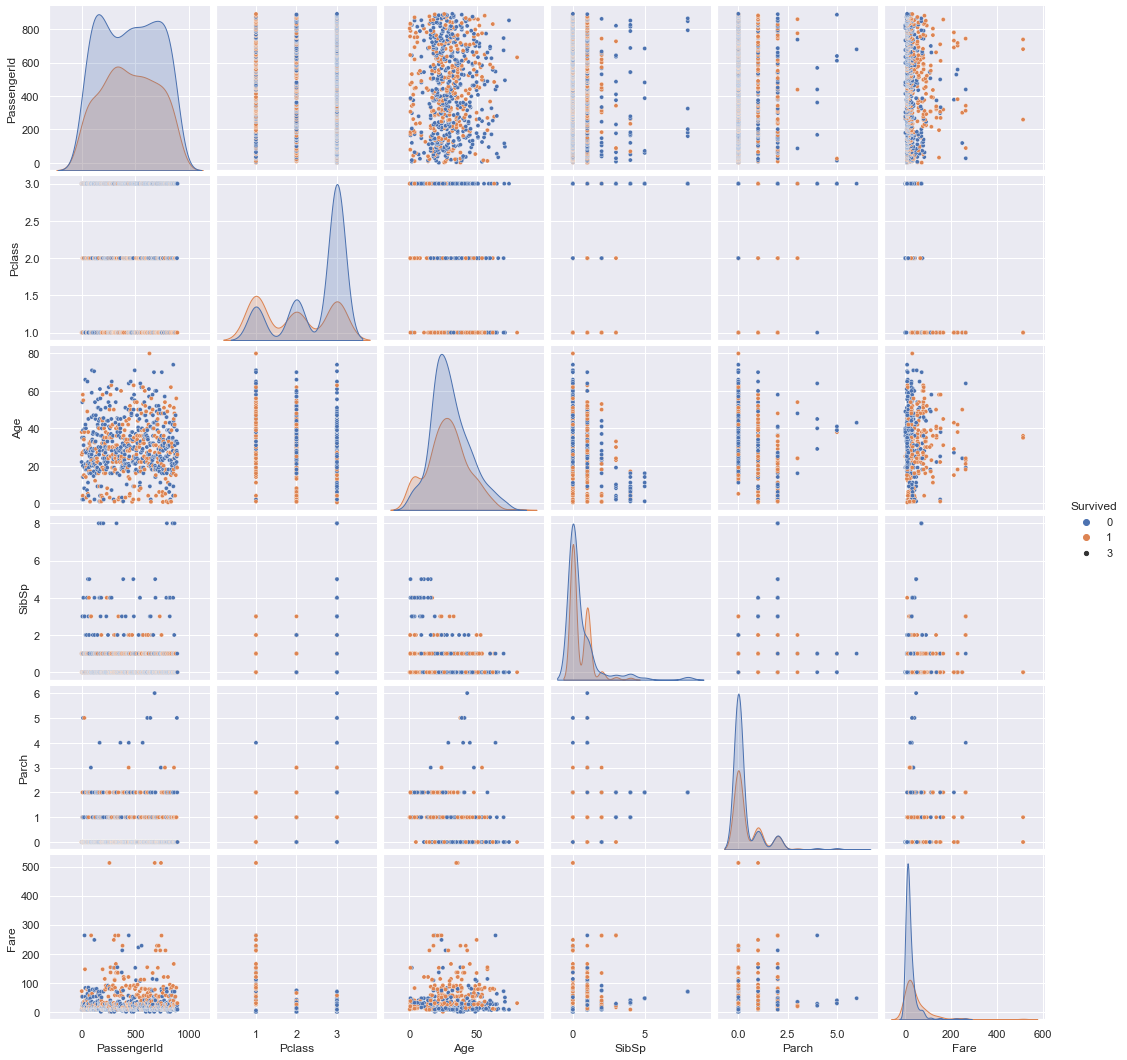

In [16]:
pairplot = sns.pairplot(train_data, hue='Survived',
            plot_kws = dict(size=3))

## Determine which features to be included in the model

In [17]:
train_data_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
# Create dummy for Sex and Embarked
train_data_copy = pd.get_dummies(data = train_data_copy, columns = ['Sex','Embarked'], drop_first = True)

# Drop PassengerId, Name, Ticket, Cabin
train_data_copy.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

## Check VIF

VIF is checked to check for multi-collinearity

In [19]:
train_input = train_data_copy.drop(columns='Survived')
train_output = train_data_copy['Survived']

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_input.values, i) for i in range(train_input.shape[1])]
vif["features"] = train_input.columns

vif

,VIF Factor,features
0,6.522944,Pclass
1,4.488239,Age
2,1.576327,SibSp
3,1.626853,Parch
4,1.664245,Fare
5,3.123879,Sex_male
6,1.604829,Embarked_Q
7,4.834418,Embarked_S


The VIF value are relatively low, we could use these features to conduct the logistic regression analysis

## Conduct train_test_split

In [21]:
#Conduct the train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_input, train_output, test_size=0.3, random_state=101)

#Do the LogisticRegression on the train split
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
#Show the weight and bias
model = pd.DataFrame()
model['Feature'] = X_train.columns
model['weights'] = logmodel.coef_.reshape(len(X_train.columns),1)
model.iloc[-1,:] = ['Bias', logmodel.intercept_]
model

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,Feature,weights
0,Pclass,-0.991426
1,Age,-0.034649
2,SibSp,-0.278305
3,Parch,-0.087432
4,Fare,0.004245
5,Sex_male,-2.611230
6,Embarked_Q,-0.013866
7,Bias,4.605835


<AxesSubplot:xlabel='Survived', ylabel='Count'>

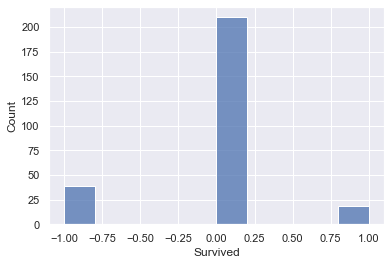

In [23]:
#Show the y_hat vs y_test difference
y_hat = logmodel.predict(X_test)
sns.histplot(y_hat - y_test)

In [24]:
#The y_hat - y_test shows that the the model predict less survivors than the number of the real survivors
#Let's put in the sklearn confusion matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_hat))

[[135  19]
 [ 39  75]]


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82       154
           1       0.80      0.66      0.72       114

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.78      0.78       268



## Use the model on test.csv

In [26]:
test_data = pd.read_csv('test.csv')

In [27]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Clean the test_data so the input is similar to train_data

<AxesSubplot:>

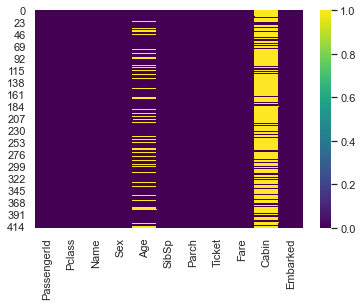

In [29]:
sns.heatmap(test_data.isnull(), cmap='viridis')

In [30]:
#Create copy of the test_data (which will be used for the prediction)
test_data_copy = test_data.copy()

In [31]:
#Get dummies for the categorical Sex and Embarked feature
test_data_copy = pd.get_dummies(data=test_data_copy, columns=['Sex', 'Embarked'], drop_first=True)

In [32]:
#Drop the features that are not used
test_data_copy.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [33]:
#Impose the age onto the missing age data
test_data_copy['Age'] = test_data_copy[['Pclass','Age']].apply(impose_age,axis = 1)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

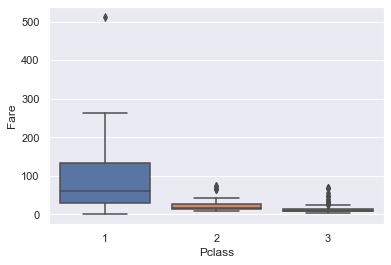

In [34]:
#Try to fill in the missing fare value, use similar method as impose age
sns.boxplot(data=test_data, y='Fare', x='Pclass')

In [35]:
test_data_copy.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000
mean,2.265550,29.247608,0.447368,0.392344,35.627188,0.636364,0.110048,0.645933
std,0.841838,12.805439,0.896760,0.981429,55.907576,0.481622,0.313324,0.478803
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,3.000000,25.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,3.000000,35.750000,1.000000,0.000000,31.500000,1.000000,0.000000,1.000000
max,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000


In [36]:
#Remove the outlier for the Pclass 1, find the mean for each Pclass
pclass_fare = test_data_copy[['Pclass','Fare']]
pclass_fare_1 = pclass_fare[pclass_fare['Pclass']==1]
pclass_fare_2 = pclass_fare[pclass_fare['Pclass']==2]
pclass_fare_3 = pclass_fare[pclass_fare['Pclass']==3]

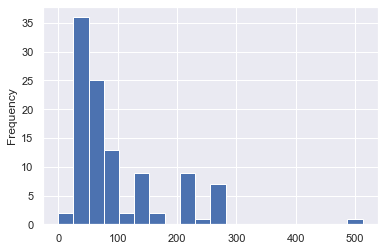

Pclass     1.00000
Fare      90.33644
dtype: float64

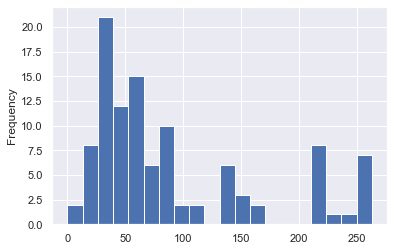

In [37]:
#Analyse Pclass1
pclass_fare_1['Fare'].plot.hist(bins=20)
plt.show()
#There is a very far outlier that affect the mean, remove the outlier
pclass_fare_1 = pclass_fare_1[pclass_fare_1['Fare']<300]
pclass_fare_1['Fare'].plot.hist(bins=20)
pclass_fare_1.mean()

<AxesSubplot:ylabel='Frequency'>

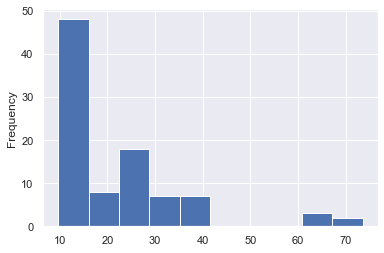

In [38]:
#Analyse Pclass2
pclass_fare_2['Fare'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

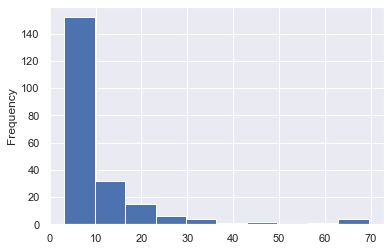

In [39]:
#Analyse Pclass3
pclass_fare_3['Fare'].plot.hist()

In [40]:
fare_mean = [pclass_fare_1.mean(),pclass_fare_2.mean(),pclass_fare_3.mean()]
fare_mean = pd.DataFrame(fare_mean)
fare_mean

,Pclass,Fare
0,1.0,90.336440
1,2.0,22.202104
2,3.0,12.459678


In [41]:
def impose_fare(cols):
    _pclass = cols[0]
    _fare = cols[1]
    if pd.isnull(_fare):
        if _pclass == 1:
            _fare = 90
        if _pclass == 2:
            _fare = 22
        else:
            _fare = 12
    return _fare

In [42]:
test_data_copy['Fare'] = test_data_copy[['Pclass','Fare']].apply(impose_fare, axis = 1)

In [43]:
test_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        418 non-null    float64
 5   Sex_male    418 non-null    uint8  
 6   Embarked_Q  418 non-null    uint8  
 7   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 17.7 KB


#### Predict the Test data

In [44]:
input_test = test_data_copy

In [45]:
test_predict = logmodel.predict(input_test)

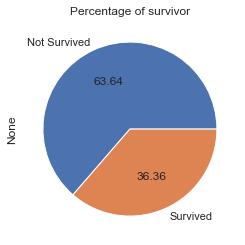

In [46]:
pd.DataFrame(test_predict, columns=['Survivor']).value_counts().plot.pie(autopct='%.2f', labels = ['Not Survived','Survived'])
plt.title('Percentage of survivor')
plt.show()

The simulation ends here, as the prediction of the test data need to be inserted into Kaggle

#### Tidy up the output data to be inserted to Kaggle

In [47]:
output = pd.DataFrame(test_predict, columns=['Survived'])
output['PassengerId'] = test_data['PassengerId']
output = output[['PassengerId','Survived']]

In [48]:
output.to_csv('output.csv', index=False)

In [49]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
